In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import Normalizer
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, ward
import time

In [9]:
logs_old=pd.read_csv('...\input\logs.csv') 
#logs_old.columns = ['depth','GR','LN(RES)','NPHI','RHOB','FTEMP','FPRESS','SP']

In [10]:
logs_old

,depth,GR,LN(RES),NPHI,RHOB,FTEMP,FPRESS,SP
0,12226.0,86.0669,2.5026,0.438305,2.3891,216.8347,6414.679,57.7099
1,12226.5,85.8324,2.6874,0.440754,2.3705,216.8434,6414.941,57.7062
2,12227.0,83.2884,3.1196,0.452673,2.3829,216.8522,6415.204,57.7031
3,12227.5,77.9761,3.8299,0.448042,2.3953,216.8609,6415.466,58.0093
4,12228.0,68.5099,5.0349,0.447581,2.4092,216.8697,6415.729,58.4692
...,...,...,...,...,...,...,...,...
215,12333.5,55.7676,7.5321,0.246218,2.3625,218.7159,6471.082,60.9560
216,12334.0,54.8399,7.7786,0.242516,2.3989,218.7246,6471.344,61.1081
217,12334.5,53.2199,7.9635,0.236497,2.4220,218.7334,6471.606,60.9510
218,12335.0,57.5999,8.1174,0.236965,2.4460,218.7421,6471.869,60.3314


In [11]:
logs_old.fillna(value=0, inplace=True)
feature_columns =  'GR NPHI RHOB SP'.split()
X_old = logs_old[feature_columns]

In [14]:
x_tmp = X_old.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_tmp)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3
0,0.754157,0.953478,0.331841,0.432964
1,0.750164,0.961407,0.276335,0.432401
2,0.706845,1.000000,0.313339,0.431929
3,0.616387,0.985005,0.350343,0.478563
4,0.455197,0.983512,0.391823,0.548607
...,...,...,...,...
215,0.238221,0.331515,0.252462,0.927352
216,0.222424,0.319528,0.361086,0.950517
217,0.194839,0.300039,0.430021,0.926590
218,0.269422,0.301554,0.501641,0.832224


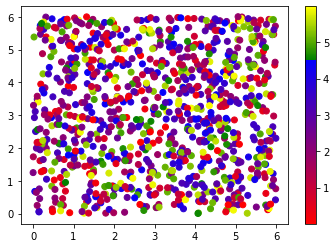

In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('red'),  c('orange'), c('violet'), c('blue'),0.76 , c('green'), c('yellow')])
N = 1000
array_dg = np.random.uniform(0, 6, size=(N, 2))
colors = np.random.uniform(0, 6, size=(N,))
plt.scatter(array_dg[:, 0], array_dg[:, 1], c=colors, cmap=rvb)
plt.colorbar()

In [16]:
y = np.random.uniform(0, 5, size=(7,))
print(y)
#y = [0.65969493 3.22287549 2.89750594 0.92066918 0.30156325 4.50262006 4.70370447]
y_cluster = [784, 840, 1418, 1073, 1743, 1100, 365]
# y = cluster_counts

[4.58418406 3.76748528 4.85599608 4.49073582 2.97957139 1.07248485
 1.52006674]


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.38625381604081394
For n_clusters = 3 The average silhouette_score is : 0.377007151759805
For n_clusters = 4 The average silhouette_score is : 0.3137053957001071
For n_clusters = 5 The average silhouette_score is : 0.31168864779320293
For n_clusters = 6 The average silhouette_score is : 0.31095742562110007
For n_clusters = 7 The average silhouette_score is : 0.3300992554918605
For n_clusters = 8 The average silhouette_score is : 0.3257110214558084
For n_clusters = 9 The average silhouette_score is : 0.32225758001141247


In [19]:
scaler = StandardScaler()
# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)
labels_s = pipeline.predict(X)
region_3 = pd.DataFrame({'classification':labels_s})
#region.head()
#region.to_csv('region.csv', index=False)
print(labels_s[:])
#region_2['classification'].unique()


[0 0 0 0 0 1 1 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
# Create a normalizer: normalizer
normalizer = Normalizer()
kmeans = KMeans(n_clusters=3, random_state=0)
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

pipeline.fit(X)
# Calculate the cluster labels: labels
labels = pipeline.predict(X)


In [15]:
region1 = pd.DataFrame({'classification':y})

In [13]:

def mpwell(tracks, title=None, mindepth=None, maxdepth=None, tagged_depths=None):
    """Create a well log using matplotlib.
       tracks: list of tracks. Each track is a dictionary with a 'traces'
       key (required), and possibly keys that describe the scale (log or linear)
       and appearance of the track. The 'traces' key points to a list of traces.
       Each trace is a dictionary containing a 'data' key that points to a Pandas
       DataFrame that contains the data to be plotted. The DataFrame must have
       a column named 'depth' that contains the depth in the desired units, and 
       also a column named the same as value of the 'curve' key in the trace. The
       trace dictionary may also have a 'label' key that provides the log mnemonic 
       for the trace, and additional keys that describe the appearance of the trace.
       title: Display title for the log.
       mindepth: minimum depth to be plotted. Optional. Determined from the first trace
       of the first track, if not specified.
       maxdepth: maximum depth to be plotted. Optional. Determined from the first trace
       of the first track, if not specified.
       tagged_depths: List of depths which should be marked on the logs with a horizontal
       line.
    """
    sns.set(rc={"figure.figsize": (40, 20)})
    sns.set_style("white")
    majorLocator = MultipleLocator(50) #50
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(10) #10
    f, axs = plt.subplots(nrows=1, ncols=len(tracks), figsize=(14, 16), tight_layout=True,sharey=True)
    #if title:
       # f.suptitle(title, fontsize=22)
    # reserve space at the top and between subplots
    f.subplots_adjust(top=0.99,wspace=0.25)
    first_trace_data = tracks[0]['traces'][0]['data']
    if mindepth is None:
        mindepth = min(first_trace_data['depth'])
    if maxdepth is None:
        maxdepth = max(first_trace_data['depth'])
    # set up each track
    #axs[0].invert_yaxis()
    for i,ax in enumerate(axs):
        ax.set_ylim(mindepth,maxdepth)
        #ax.invert_yaxis()
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)
        ax.yaxis.set_minor_locator(minorLocator)
        ax.yaxis.set_major_locator(majorLocator)
        ax.yaxis.grid(b=True, which='major', color='k', linestyle='-')
        ax.yaxis.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.5)
        ax.minorticks_on()
       
        
    # plot each trace in each track
    for num_track, track in enumerate(tracks):
        for i, trace in enumerate(track['traces']):
            fill = track.get('fill', trace['fill'])
            color = track.get('color', trace['color'])
            label = trace.get('label', trace['curve'])
            ls = trace.get('ls', '-')
            marker = trace.get('marker', 'None')
            axi = axs[num_track]#.twiny()
            axi.set_ylim(mindepth, maxdepth)
            
            
            axi.set_xlabel(label, color=color, labelpad=5, fontsize=14)
            axi.xaxis.set_ticks_position('top')
            axi.xaxis.set_label_position('top')

            if (fill == 1):
                class_depth(axi,tagged_depths, label, color)
                axi.minorticks_off()
                axi.grid(False)
            
            elif (fill==2):
                axi.plot(tracks[num_track]['traces'][0]['data'], tagged_depths, ls=ls, marker=marker, color=color)
                axi.set_xscale('log')
                axi.spines['top'].set_position(('outward', 5+30*i))
                axi.spines['top'].set_color(color)
                #x_pos_label=[trace['range'][0], '','','','', trace['range'][1]]
                #axi.set_xticks(x_pos)
                #axi.set_xticklabels(x_pos_label, rotation = 0,fontsize=14)
                #axi.invert_yaxis()
                
            
            else:
                axi.plot(tracks[num_track]['traces'][0]['data'], tagged_depths, ls=ls, marker=marker, color=color)
               # axi.set_xlim(*trace['range'])
                axi.spines['top'].set_position(('outward', 5+30*i))
                axi.spines['top'].set_color(color)
                axi.xaxis.set_ticks(trace['range'])
                axi.tick_params(axis='x', colors=color, length=0)
                #plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
                extent= (trace['range'][1] - trace['range'][0])/5
                extent1= extent/3
                majorLocator1 = MultipleLocator(extent)
                minorLocator1 = MultipleLocator(extent1)
                axi.xaxis.set_major_locator(majorLocator1)
                axi.xaxis.set_minor_locator(minorLocator1)
                axi.xaxis.grid(b=True, which='major', color='k', linestyle='-')
                axi.xaxis.grid(b=True, which='minor', color='r', linestyle='-.', alpha=0.2)
                x_pos=[trace['range'][0],trace['range'][0]+extent, trace['range'][0]+2*extent,\
                       trace['range'][0]+3*extent,trace['range'][0]+4*extent,trace['range'][1]]
                x_pos_label=[trace['range'][0], '','','','', trace['range'][1]]
                axi.set_xticks(x_pos)
                axi.set_xticklabels(x_pos_label, rotation = 0,fontsize=14)
                #axi.invert_yaxis()
                
                
            if 'xref' in trace:
                axi.axvline(trace['xref'], color='k', linestyle='--')
           
            
        axs[0].set_ylim(ax.get_ylim()[::-1])    
        axs[0].set_ylabel('Depth (ft)',fontsize=20)
    return f

In [87]:
#f,ax = plt.subplots(figsize=(5, 20))
def class_depth (ax, depth, label, color):

    patches = []
    for i in range(len(logs)):
        poly=Rectangle((0,depth[i]), 4, 1)
    #poly=Rectangle([(0, depth[i]), (5, depth[i]), (0 , depth[i]+1), (5 , depth[i]+1) ], True)
        patches.append(poly)

    p = PatchCollection(patches, match_original=False, cmap=rvb, alpha=0.7)

    colors = 100*np.array(newregion['classification'])
    #print(np.unique(colors))
    p.set_array(np.array(colors))
#p.set_array(np.array(colors))
    ax.add_collection(p)
    #ax.invert_yaxis()
    ax.set_xlabel(label, color=color, labelpad=5, fontsize=14)
    x_pos_label=['', '','','']
    ax.set_xticklabels(x_pos_label, rotation = 0)
    ax.get_xaxis().set_visible(True)
    #ax.set_xlim([0,4])

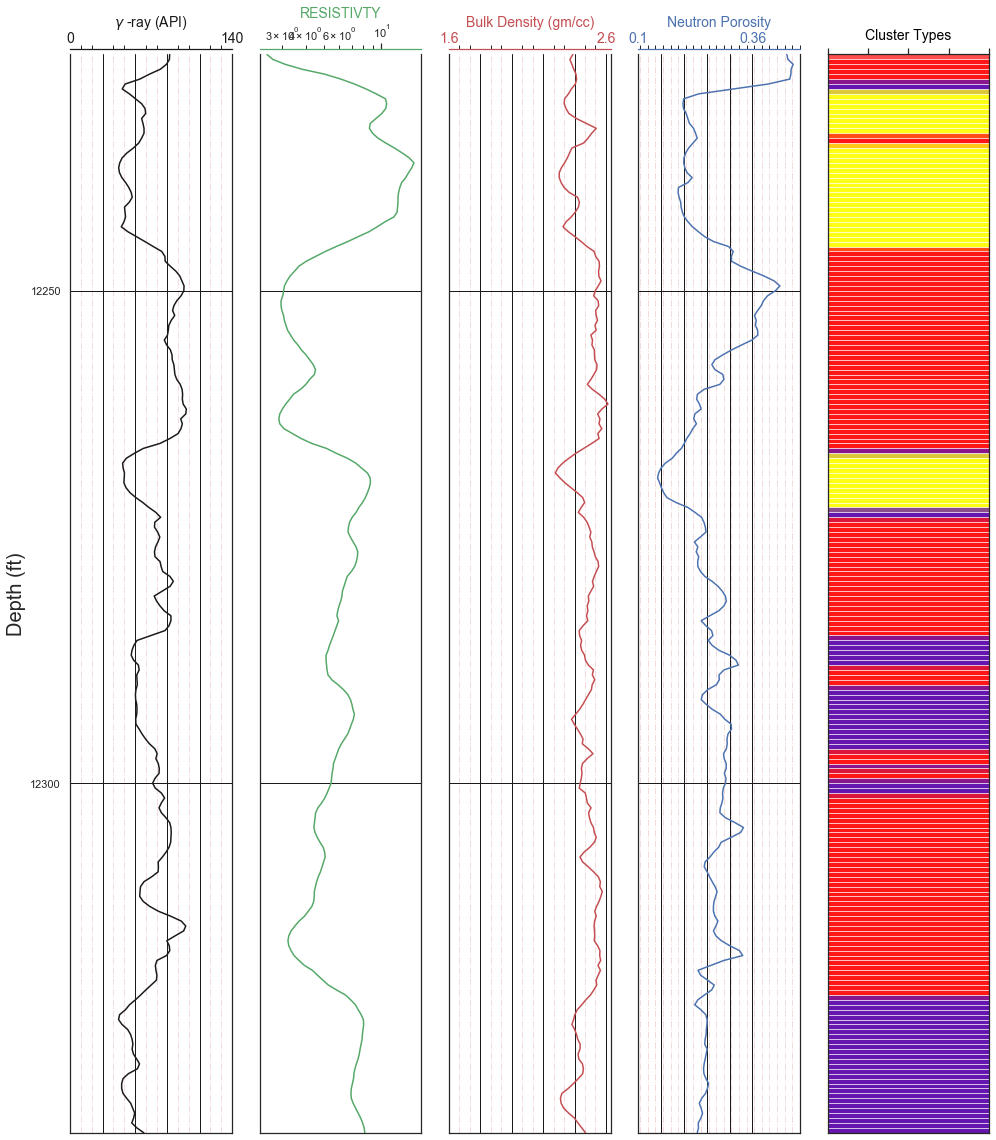

In [88]:
logs=logs_old
trace11 = {'data': logs['GR'], 'curve': '$\gamma$ -ray (API)', 'color': 'k', 'fill':0,'range': (0, 140)}
track1 = {'traces': [trace11]}
trace21 = {'data': logs['LN(RES)'], 'curve': 'RESISTIVTY', 'color': 'g', 'fill':2,'range': (1, 100)}
track2 = {'traces': [trace21]}

trace31 = {'data': logs['RHOB'], 'curve': 'Bulk Density (gm/cc)', 'color': 'r','fill':0,'range': (1.6, 2.6)}    
track3 = {'traces': [trace31]}
trace41 = {'data': logs['NPHI'], 'curve': 'Neutron Porosity', 'color': 'b', 'fill':0,'range': (0.1, 0.36)}
track4 = {'traces': [trace41]}

trace61 = {'data': region_2['classification'], 'curve': 'Cluster Types', 'color':'Black', 'fill':1,'range': (0,4)}
track6 = {'traces': [trace61]}
tracks = [track1, track2, track3,track4,track6]

xrd_depths = logs['depth']
log = mpwell(tracks, 'My well', min(xrd_depths), max(xrd_depths), logs['depth'].values ) 

In [89]:
log.savefig('well_3clusters.png')


100.5045

In [23]:

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_scaled)

In [24]:
Assignment = pd.DataFrame({'classification':assignment})

In [21]:
#map_replace={0:2,1:0,2:1}
#Assignment_copy=Assignment
#Assignment_copy=Assignment_copy.replace(map_replace)
#Assignment_copy

In [28]:
linkage_array = ward(X)

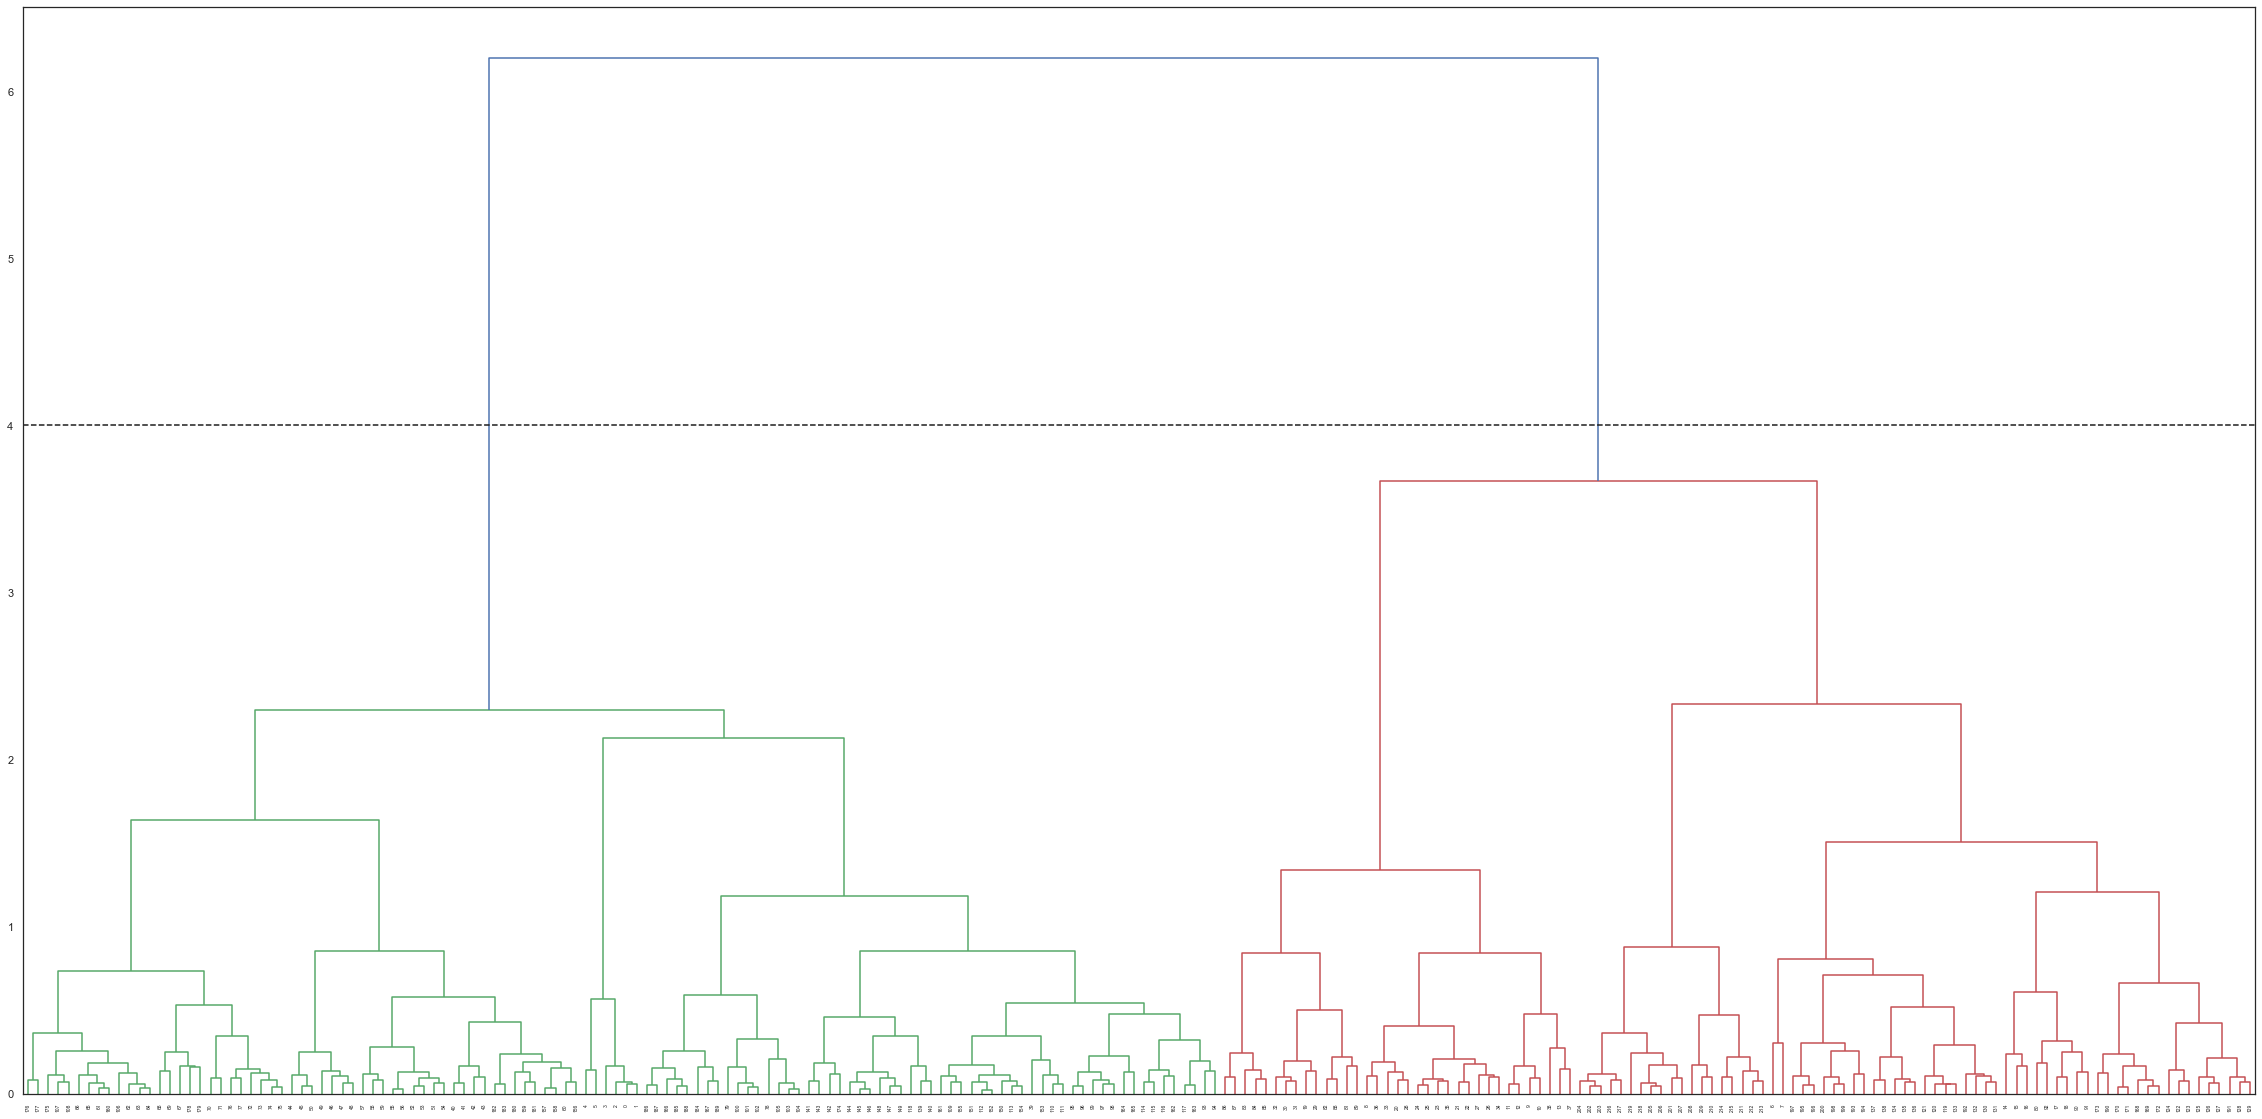

In [29]:
dendrogram(linkage_array)
# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')


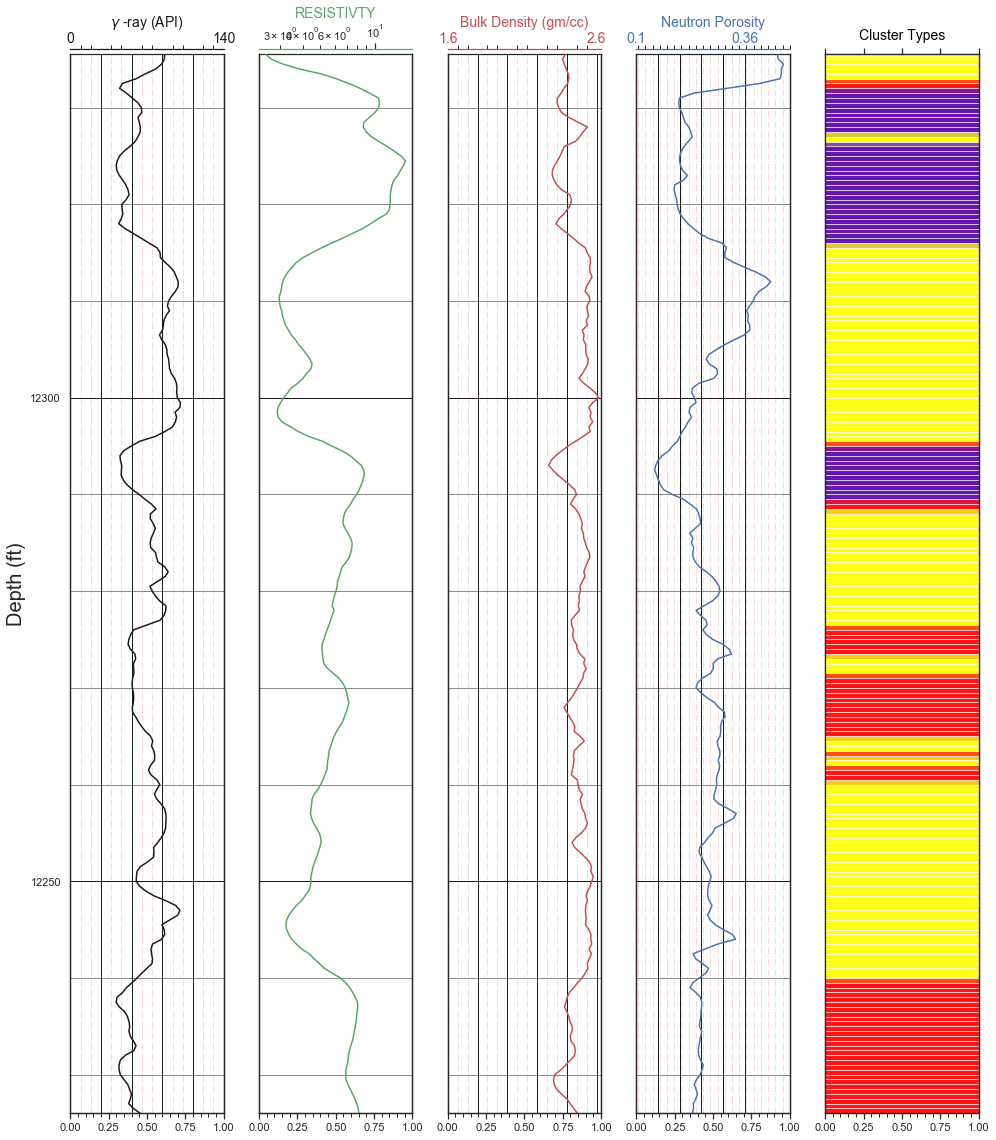

In [31]:
trace11 = {'data': logs['GR'], 'curve': '$\gamma$ -ray (API)', 'color': 'k', 'fill':0,'range': (0, 140)}
track1 = {'traces': [trace11]}
trace21 = {'data': logs['LN(RES)'], 'curve': 'RESISTIVTY', 'color': 'g', 'fill':2,'range': (1, 100)}
track2 = {'traces': [trace21]}

trace31 = {'data': logs['RHOB'], 'curve': 'Bulk Density (gm/cc)', 'color': 'r','fill':0,'range': (1.6, 2.6)}    
track3 = {'traces': [trace31]}
trace41 = {'data': logs['NPHI'], 'curve': 'Neutron Porosity', 'color': 'b', 'fill':0,'range': (0.1, 0.36)}
track4 = {'traces': [trace41]}

trace61 = {'data': Assignment_copy['classification'], 'curve': 'Cluster Types', 'color':'Black', 'fill':1,'range': (0,4)}
track6 = {'traces': [trace61]}
tracks = [track1, track2, track3,track4,track6]
xrd_depths = logs['depth']
log_ass = mpwell(tracks, 'My well', min(xrd_depths), max(xrd_depths), logs['depth'].values ) 

In [32]:
log_ass.savefig('well_ass_3clusters.png')

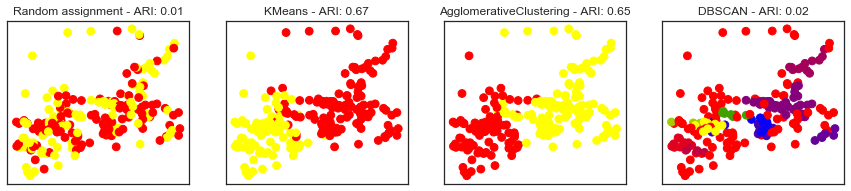

In [33]:


# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
DBSCAN()]
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=rvb, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
# plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
    cmap=rvb, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
    adjusted_rand_score(y, clusters)))

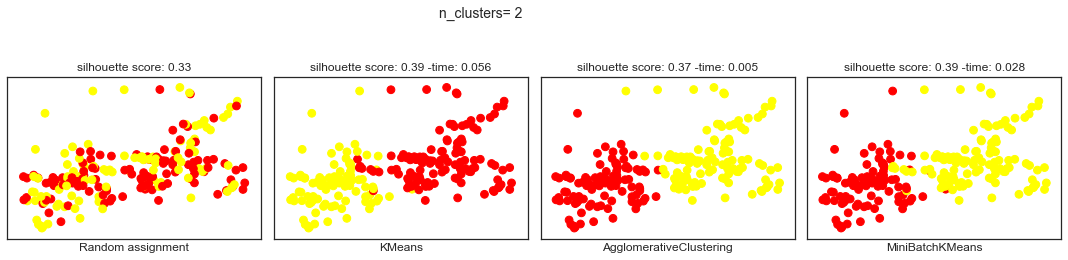

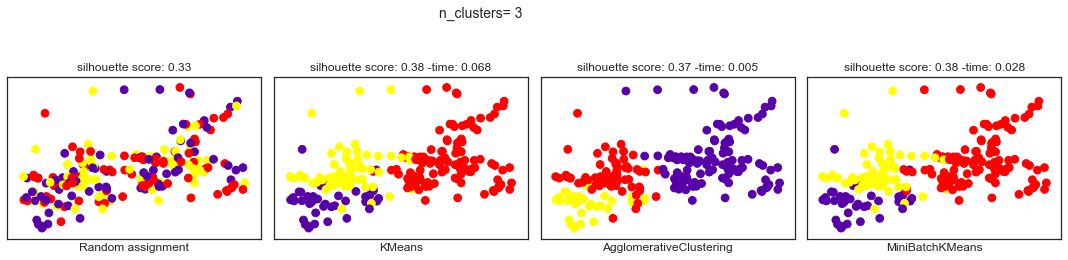

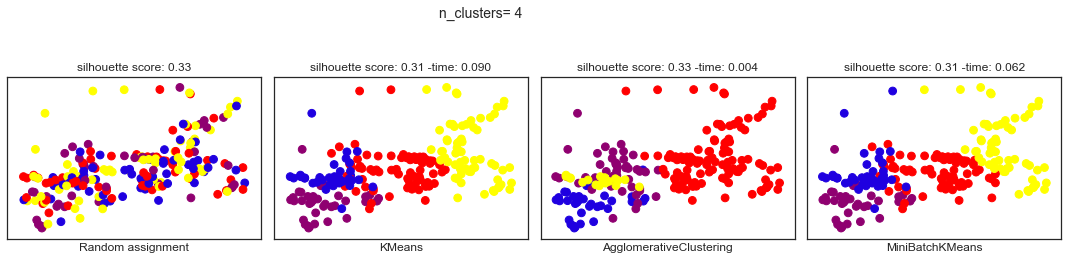

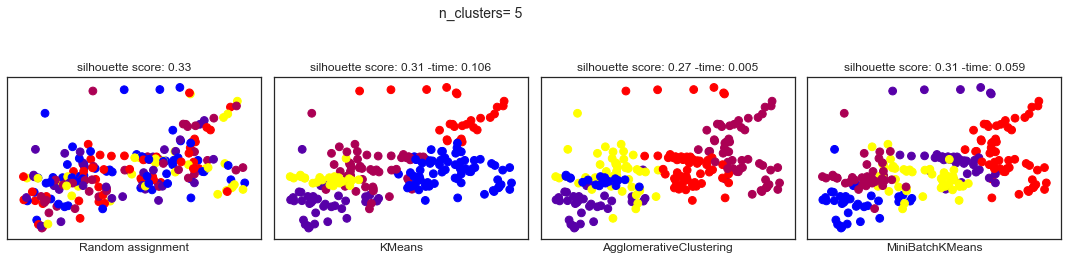

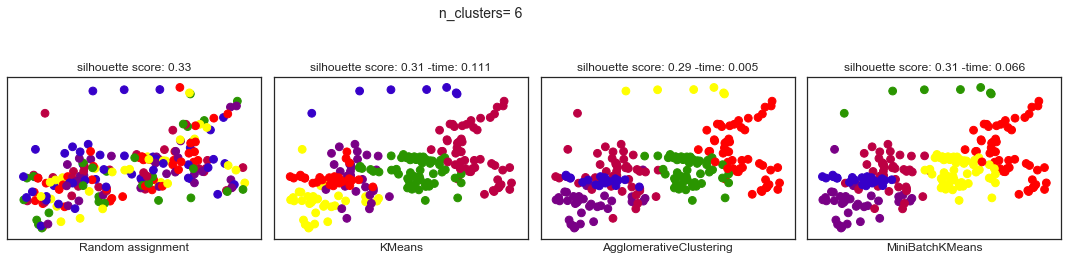

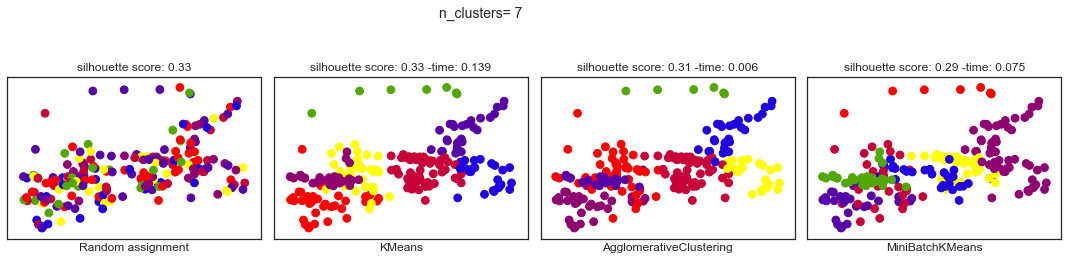

In [34]:



X_scaled = X.values
n_clusters=[2,3,4,5,6,7]
for i in n_clusters:
    fig, axes = plt.subplots(1, 4, figsize=(15, 3),
    subplot_kw={'xticks': (), 'yticks': ()},tight_layout=True)
    fig.suptitle("n_clusters= {}".format(i),fontsize=14, y=1.2, x=0.45)


# make a list of algorithms to use
    algorithms = [KMeans(n_clusters=i), AgglomerativeClustering(n_clusters=i),MiniBatchKMeans(n_clusters=i)]
# create a random cluster assignment for reference
    random_state = np.random.RandomState(seed=0)
    random_clusters = random_state.randint(low=0, high=i, size=len(X))
# plot random assignment
    axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=rvb, s=60)
    axes[0].set_title("silhouette score: {:.2f}".format(silhouette_score(X, cluster_labels)))
    axes[0].set_xlabel("Random assignment")
    for ax, algorithm in zip(axes[1:], algorithms):
# plot the cluster assignments and cluster centers
        start_time = time.time()
        clusters = algorithm.fit_predict(X_scaled)
        end_time=time.time()
        diff=end_time-start_time
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
        cmap=rvb, s=60)
        try:
            silhouette_avg = silhouette_score(X, clusters)
        except ValueError:
            pass
        ax.set_title("silhouette score: {:.2f} -time: {:.3f}".format(silhouette_avg,diff))
        ax.set_xlabel("{}".format(algorithm.__class__.__name__))
        fig.savefig('cluster with sil '+str(i)+'.png')

In [36]:

#clustering

